# Using pickle to predict unknown data.

In [2]:
#Main program

#clean the memory
#in ipython
%reset -f 

#in python
import gc
gc.collect()

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
from scipy import stats

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
#show plots in the Jupyter Notebook
%matplotlib inline
#configure visualization defaults
sns.set(style='white', context='notebook', palette='deep')
sns.set_style('white')


# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, Ridge

from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from yellowbrick.classifier import ClassPredictionError
from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ClassificationReport

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

#these piece of codes are learned from the Data Sciences Certficate course

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import precision_score

from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier

import pickle

In [3]:
# Imports - you'll need some of these later, but it's traditional to put them all at the beginning.
# Downloading from the data server only need once.

import os
import csv
import json

#from collections import Counter
from operator import itemgetter
from requests import get


def download(download_url, output_file):
    """
    Downloads a URL and writes it to the specified path. The "path" 
    is like the mailing address for the file - it tells the function 
    where on your computer to send it!
    
    Also note the use of "with" to automatically close files - this 
    is a good standard practice to follow.
    """
    with open(output_file,'wb') as f:
        response = get(download_url)
        f.write(response.content)
        
        
## Write the Python to execute the function and download the file here:
url = "http://ftp.ncbi.nlm.nih.gov/geo/series/FSE/113nnn/GSE113486/matrix/GSE112264_series_matrix.txt.gz"
path = "C:/BigData/DSCert/input/GSE112264_series_matrix.txt.gz"


#Acquire data
#The Python Pandas packages helps us work with our datasets. We start by acquiring the "master" data generated by computer
#we will split the data into training and testing datasets later.
#
#downloaded master file for this project: 
"""
#Training Dataset
bladder_cancer_file = "C:/Users/Liu_PC/Documents/Georgetown/GSE113486_series_matrix.txt"

ro1 = list(range(0,50))
ro2 = list(range(51,73))
d =  ro1 +  ro2
print(d)
 
df = pd.read_csv(bladder_cancer_file, delimiter="\t", skiprows = d, skipfooter =1, header = None, engine ='python') 
#df = pd.read_csv(bladder_cancer_file, delimiter="\t", skiprows =50, skipfooter =1, header = None, engine ='python') 

df.head(20)
#df3 = df3.drop([5,6,7,8,9,10,11,12,13,14,15,16,17,18,20,21,22,23,24], axis=0) 
"""
Testing_bladder_cancer_file = "C:/BigData/DSCert/input/GSE112264_series_matrix.txt"
#"C:/Users/Liu_PC/Documents/Georgetown/GSE112264_series_matrix.txt"

ro1 = list(range(0,47))
ro2 = list(range(48,74))
d =  ro1 +  ro2
print(d)
 
df = pd.read_csv(Testing_bladder_cancer_file, delimiter="\t", skiprows = d, skipfooter =1, header = None, engine ='python') 
#df = pd.read_csv(bladder_cancer_file, delimiter="\t", skiprows =50, skipfooter =1, header = None, engine ='python') 

df.head(40)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,...,1492,1493,1494,1495,1496,1497,1498,1499,1500,1501,1502,1503,1504,1505,1506,1507,1508,1509,1510,1511,1512,1513,1514,1515,1516,1517,1518,1519,1520,1521,1522,1523,1524,1525,1526,1527,1528,1529,1530,1531,1532,1533,1534,1535,1536,1537,1538,1539,1540,1541,1542,1543,1544,1545,1546,1547,1548,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558,1559,1560,1561,1562,1563,1564,1565,1566,1567,1568,1569,1570,1571,1572,1573,1574,1575,1576,1577,1578,1579,1580,1581,1582,1583,1584,1585,1586,1587,1588,1589,1590,1591
0,!Sample_characteristics_ch1,disease state: Biliary Tract Cancer,disease state: Biliary Tract Cancer,disease state: Biliary Tract Cancer,disease state: Biliary Tract Cancer,disease state: Biliary Tract Cancer,disease state: Biliary Tract Cancer,disease state: Biliary Tract Cancer,disease state: Biliary Tract Cancer,disease state: Biliary Tract Cancer,disease state: Biliary Tract Cancer,disease state: Biliary Tract Cancer,disease state: Biliary Tract Cancer,disease state: Biliary Tract Cancer,disease state: Biliary Tract Cancer,disease state: Biliary Tract Cancer,disease state: Biliary Tract Cancer,disease state: Biliary Tract Cancer,disease state: Biliary Tract Cancer,disease state: Biliary Tract Cancer,disease state: Biliary Tract Cancer,disease state: Biliary Tract Cancer,disease state: Biliary Tract Cancer,disease state: Biliary Tract Cancer,disease state: Biliary Tract Cancer,disease state: Biliary Tract Cancer,disease state: Biliary Tract Cancer,disease state: Biliary Tract Cancer,disease state: Biliary Tract Cancer,disease state: Biliary Tract Cancer,disease state: Biliary Tract Cancer,disease state: Biliary Tract Cancer,disease state: Biliary Tract Cancer,disease state: Biliary Tract Cancer,disease state: Biliary Tract Cancer,disease state: Biliary Tract Cancer,disease state: Biliary Tract Cancer,disease state: Biliary Tract Cancer,disease state: Biliary Tract Cancer,disease state: Biliary Tract Cancer,disease state: Biliary Tract Cancer,disease state: Biliary Tract Cancer,disease state: Biliary Tract Cancer,disease state: Biliary Tract Cancer,disease state: Biliary Tract Cancer,disease state: Biliary Tract Cancer,disease state: Biliary Tract Cancer,disease state: Biliary Tract Cancer,disease state: Biliary Tract Cancer,disease state: Biliary Tract Cancer,disease state: Biliary Tract Cancer,disease state: Bladder Cancer,disease state: Bladder Cancer,disease state: Bladder Cancer,disease state: Bladder Cancer,disease state: Bladder Cancer,disease state: Bladder Cancer,disease state: Bladder Cancer,disease state: Bladder Cancer,disease state: Bladder Cancer,disease state: Bladder Cancer,disease state: Bladder Cancer,disease state: Bladder Cancer,disease state: Bladder Cancer,disease state: Bladder Cancer,disease state: Bladder Cancer,disease state: Bladder Cancer,disease state: Bladder Cancer,disease state: Bladder Cancer,disease state: Bladder Cancer,disease state: Bladder Cancer,disease state: Bladder Cancer,disease state: Bladder Cancer,disease state: Bladder Cancer,disease state: Bladder Cancer,disease state: Bladder Cancer,disease state: Bladder Cancer,disease state: Bladder Cancer,disease state: Bladder Cancer,disease state: Bladder Cancer,disease state: Bladder Cancer,disease state: Bladder Cancer,disease state: Bladder Cancer,disease state: Bladder Cancer,disease state: Bladder Cancer,disease state: Bladder Cancer,disease state: Bladder Cancer,disease state: Bladder Cancer,disease state: Bladder Cancer,disease state: Bladder Cancer,disease state: Bladder Cancer,disease state: Bladder Cancer,disease state: Bladder Cancer,disease state: Bladder Cancer,disease state: Bladder Cancer,disease state: Bladder Cancer,disease state: Bladder Ca

In [4]:
df.tail(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,...,1492,1493,1494,1495,1496,1497,1498,1499,1500,1501,1502,1503,1504,1505,1506,1507,1508,1509,1510,1511,1512,1513,1514,1515,1516,1517,1518,1519,1520,1521,1522,1523,1524,1525,1526,1527,1528,1529,1530,1531,1532,1533,1534,1535,1536,1537,1538,1539,1540,1541,1542,1543,1544,1545,1546,1547,1548,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558,1559,1560,1561,1562,1563,1564,1565,1566,1567,1568,1569,1570,1571,1572,1573,1574,1575,1576,1577,1578,1579,1580,1581,1582,1583,1584,1585,1586,1587,1588,1589,1590,1591
2562,MIMAT0032116,3.489,6.380,6.242,5.870,7.778,6.192,5.851,7.558,6.155,5.382,6.392,7.532,6.688,6.076,6.396,6.172,6.915,6.011,6.059,7.532,6.263,6.460,6.557,7.686,7.386,6.431,6.266,6.715,6.828,5.102,6.393,6.515,6.053,5.831,6.195,7.084,6.472,5.789,5.901,6.813,6.954,6.979,6.257,6.250,7.371,6.235,6.690,5.977,5.801,7.290,6.598,7.353,7.055,6.640,7.117,5.644,7.572,6.395,5.338,6.709,7.118,5.867,5.697,6.879,6.005,6.411,6.424,5.630,7.646,6.450,6.259,5.084,7.109,5.659,7.250,7.141,7.750,7.685,0.702,7.076,7.951,5.891,5.215,6.226,6.976,6.845,1.008,8.198,6.991,4.730,6.188,7.352,5.950,7.025,5.651,7.504,5.287,6.045,6.936,...,5.276,-0.522,5.206,4.909,6.327,6.525,6.005,7.215,6.512,7.018,6.118,8.134,4.725,6.258,5.508,5.964,5.915,6.32,6.827,5.943,0.191,5.079,6.514,6.061,6.257,6.087,8.217,6.522,6.059,4.876,6.227,6.206,6.854,5.899,6.543,6.2,9.129,5.698,5.409,6.197,5.742,6.048,5.963,5.918,5.489,6.531,6.524,6.708,6.97,6.84,6.695,5.976,6.247,6.33,6.684,6.216,6.931,6.102,6.26,6.466,2.883,4.682,6.355,5.188,6.174,4.976,6.633,5.99,5.97,5.905,6.281,5.421,3.574,6.039,4.012,2.876,5.084,6.148,0.691,5.09,5.924,1.535,6.795,6.518,6.195,6.008,5.497,5.38,5.892,6.286,7.17,5.805,5.971,4.981,6.421,0.35,6.053,5.385,5.847,6.161
2563,MIMAT0033692,5.389,5.964,2.263,5.845,5.286,5.726,4.112,3.727,5.359,5.285,5.048,5.772,4.949,4.189,5.524,6.006,4.789,5.367,6.271,6.567,5.333,6.318,6.358,6.366,5.797,5.112,5.454,5.562,6.320,3.972,5.098,5.459,5.256,5.511,4.883,5.124,4.854,4.593,4.954,4.315,6.121,3.670,4.319,5.800,0.587,5.766,3.133,5.419,0.317,5.200,6.062,2.030,0.112,6.605,5.637,4.314,4.521,3.480,0.299,3.700,2.293,4.556,6.568,4.778,4.904,0.878,3.540,0.752,5.214,5.010,4.171,6.160,5.880,5.646,5.378,1.045,5.340,4.176,6.182,4.834,1.063,0.655,5.737,4.856,2.765,0.870,1.008,6.251,5.235,3.595,6.526,0.043,5.800,5.562,6.646,5.336,7.490,5.060,6.456,...,4.992,5.527,5.03,5.39,6.047,5.664,4.791,5.593,4.849,5.722,4.783,6.03,4.242,4.901,6.102,5.286,6.443,4.552,5.995,5.459,5.209,5.703,5.644,5.596,5.924,4.614,6.22,6.13,6.16,4.504,5.488,5.312,5.473,5.355,5.705,5.572,5.711,5.303,5.178,5.573,5.503,6.505,5.543,5.173,5.453,4.94,5.647,6.7,6.137,5.89,6.032,5.301,4.764,5.91,4.862,3.582,1.649,6.72,-0.165,3.596,1.392,5.871,4.869,4.641,1.686,5.76,3.89,4.403,5.252,5.025,6.183,4.7,3.155,5.56,3.185,4.329,5.303,3.774,3.443,2.699,5.293,6.455,4.793,4.561,4.388,4.497,5.372,5.103,5.193,4.937,5.624,3.577,5.305,5.108,5.44,4.932,3.926,5.162,5.665,5.771
2564,MIMAT0035542,-0.297,4.810,2.526,3.527,3.961,5.045,4.551,5.644,5.575,6.403,4.350,4.087,3.817,4.552,4.517,6.251,2.572,0.041,3.576,5.456,-0.898,5.384,4.138,5.049,3.642,3.388,4.309,5.698,5.610,3.402,3.187,5.743,4.034,0.489,3.577,5.892,-0.220,-0.704,-0.250,4.553,4.866,5.513,3.022,5.901,0.587,-0.288,0.282,3.589,0.317,1.695,3.480,2.030,0.112,1.497,4.266,3.586,5.420,-0.017,0.299,0.475,6.201,-0.959,1.706,-1.030,-0.329,0.878,4.154,0.752,5.128,4.896,6.591,0.320,4.361,5.763,3.747,5.870,1.844,5.367,3.740,3.815,1.063,5.208,-0.171,0.061,2.426,3.455,6.245,0.550,0.064,-0.092,3.823,3.571,-0.865,0.034,-0.048,5.204,0.029,3.903,4.634,...,1.41,-0.522,1.106,-0.604,3.101,0.068,-0.303,1.072,4.165,-0.856,-0.379,4.322,-0.749,-0.811,0.056,-0.749,4.73,-0.138,4.767,1.86,0.191,-1.993,1.467,3.764,-1.057,-1.64,2.965,0.

In [5]:
df1 = df.T

df1.loc[0, 0] = 'Cancer_type'

df1.loc[0, 1] = 'Sample_ID'



In [6]:
del df

#now the dataframe is indexable
new_header = df1.iloc[0] #grab the first row for the header
df1 = df1[1:] #take the data less the header row
df1.columns = new_header 

df1.to_csv("Bladder_CancerTestingSet.CleanedData.txt", sep="\t", index = False)


#df3 =pd.concat([df.iloc[[25],:], df.iloc[[2],:], df.drop([2, 25], axis=0)], axis=0)

#print(disease_status)
df1.head(10)

,Cancer_type,Sample_ID,MIMAT0000062,MIMAT0000063,MIMAT0000064,MIMAT0000065,MIMAT0000066,MIMAT0000067,MIMAT0000068,MIMAT0000069,MIMAT0000070,MIMAT0000071,MIMAT0000072,MIMAT0000073,MIMAT0000074,MIMAT0000075,MIMAT0000076,MIMAT0000077,MIMAT0000078,MIMAT0000079,MIMAT0000080,MIMAT0000081,MIMAT0000082,MIMAT0000083,MIMAT0000084,MIMAT0000085,MIMAT0000086,MIMAT0000087,MIMAT0000088,MIMAT0000089,MIMAT0000090,MIMAT0000091,MIMAT0000092,MIMAT0000093,MIMAT0000094,MIMAT0000095,MIMAT0000096,MIMAT0000097,MIMAT0000098,MIMAT0000099,MIMAT0000100,MIMAT0000101,MIMAT0000102,MIMAT0000103,MIMAT0000104,MIMAT0000222,MIMAT0000226,MIMAT0000227,MIMAT0000228,MIMAT0000231,"MIMAT0000232, MIMAT0004563",MIMAT0000241,MIMAT0000242,MIMAT0000243,MIMAT0000244,MIMAT0000245,MIMAT0000250,MIMAT0000251,MIMAT0000252,MIMAT0000253,MIMAT0000254,MIMAT0000255,MIMAT0000256,MIMAT0000257,MIMAT0000258,MIMAT0000259,MIMAT0000260,MIMAT0000261,MIMAT0000262,MIMAT0000263,MIMAT0000264,MIMAT0000265,MIMAT0000266,MIMAT0000267,MIMAT0000268,MIMAT0000269,MIMAT0000270,MIMAT0000271,MIMAT0000272,MIMAT0000273,MIMAT0000274,MIMAT0000275,MIMAT0000276,MIMAT0000278,MIMAT0000279,MIMAT0000280,MIMAT0000281,MIMAT0000318,MIMAT0000414,MIMAT0000415,MIMAT0000416,MIMAT0000417,MIMAT0000418,MIMAT0000419,MIMAT0000420,MIMAT0000421,MIMAT0000422,MIMAT0000423,MIMAT0000424,MIMAT0000425,...,MIMAT0028225,MIMAT0028226,MIMAT0028227,MIMAT0028228,MIMAT0028229,MIMAT0028230,MIMAT0028231,MIMAT0028232,MIMAT0028233,MIMAT0028234,MIMAT0028235,MIMAT0029310,MIMAT0029782,MIMAT0030017,MIMAT0030018,MIMAT0030019,MIMAT0030020,MIMAT0030021,MIMAT0030411,MIMAT0030412,MIMAT0030413,MIMAT0030414,MIMAT0030415,MIMAT0030416,MIMAT0030417,MIMAT0030418,MIMAT0030419,MIMAT0030420,MIMAT0030421,MIMAT0030422,MIMAT0030423,MIMAT0030424,MIMAT0030425,MIMAT0030426,MIMAT0030427,MIMAT0030428,MIMAT0030429,MIMAT0030430,MIMAT0030431,MIMAT0030979,MIMAT0030980,MIMAT0030981,MIMAT0030982,MIMAT0030983,MIMAT0030984,MIMAT0030985,MIMAT0030986,MIMAT0030987,MIMAT0030988,MIMAT0030989,MIMAT0030990,MIMAT0030991,MIMAT0030992,MIMAT0030993,MIMAT0030994,MIMAT0030995,MIMAT0030996,MIMAT0030997,MIMAT0030998,MIMAT0030999,MIMAT0031000,MIMAT0031001,MIMAT0031002,MIMAT0031003,MIMAT0031004,MIMAT0031005,MIMAT0031006,MIMAT0031007,MIMAT0031008,MIMAT0031009,MIMAT0031010,MIMAT0031011,MIMAT0031012,MIMAT0031013,MIMAT0031014,MIMAT0031015,MIMAT0031016,MIMAT0031074,MIMAT0031095,MIMAT0031119,MIMAT0031120,MIMAT0031175,MIMAT0031176,MIMAT0031177,MIMAT0031178,MIMAT0031179,MIMAT0031180,MIMAT0031181,MIMAT0031890,MIMAT0031892,MIMAT0031893,MIMAT0032026,MIMAT0032029,MIMAT0032110,"MIMAT0032114, MIMAT0032115",MIMAT0032116,MIMAT0033692,MIMAT0035542,MIMAT0035703,MIMAT0035704
1,disease state: Biliary Tract Cancer,GSM3063093,-0.297,-0.297,-0.297,3.977,-0.297,-0.297,-0.297,4.513,2.658,5.916,-0.297,-0.297,-0.297,6.594,5.158,-0.297,-0.297,-0.297,4.475,-0.297,-0.297,-0.297,-0.297,3.690,-0.297,-0.297,-0.297,3.408,-0.297,-0.297,6.603,6.386,-0.297,-0.297,-0.297,3.209,-0.297,-0.297,5.038,-0.297,-0.297,-0.297,2.434,-0.297,-0.297,-0.297,7.309,7.036,4.461,-0.297,-0.297,-0.297,-0.297,4.174,-0.297,3.410,-0.297,-0.297,2.533,-0.297,-0.297,-0.297,-0.297,-0.297,-0.297,-0.297,-0.297,7.217,7.436,-0.297,-0.297,4.174,-0.297,-0.297,-0.297,5.491,-0.297,-0.297,-0.297,2.777,-0.297,4.083,-0.297,-0.297,-0.297,5.108,-0.297,-0.297,-0.297,-0.297,-0.297,4.054,5.964,-0.297,5.440,0.788,-0.297,-0.297,...,-0.297,-0.297,-0.297,-0.297,-0.297,4.108,-0.297,-0.297,-0.297,-0.297,-0.297,-0.297,-0.297,-0.297,-0.297,13.347,3.030,-0.297,-0.297,-0.297,5.184,7.497,-0.297,-0.297,-0.297,-0.297,-0.297,5.708,4.547,6.135,-0.297,4.782,-0.297,3.422,-0.297,-0.297,-0.297,-0.297,-0.297,6.213,-0.297,4.864,-0.297,5.894,-0.297,-0.297,9.488,-0.297,-0.297,-0.297,6.745,-0.297,-0.297,-0.297,-0.297,-0.297,12.125,-0.297,6.693,12.879,7.140,-0.297,-0.297,-0.297,-0.297,-0.297,-0.297,-0.297,-0.297,-0.297,-0.297,-0.297,-0.297,-0.297,-0.297,-0.297,1.279,-0.297,10.791,5.558,4.655,-0.297,-0.297,-0.297,6.995,-0.297,8.796,-0.297,-0.297,-0.297,-0.297,-0.297,6.933,-0.297,-0.297,3.489,5.389,-0.2

In [7]:
df = pd.read_csv("Bladder_CancerTestingSet.CleanedData.txt", delimiter="\t") 
#df = df.T

df.head(10)


,Cancer_type,Sample_ID,MIMAT0000062,MIMAT0000063,MIMAT0000064,MIMAT0000065,MIMAT0000066,MIMAT0000067,MIMAT0000068,MIMAT0000069,MIMAT0000070,MIMAT0000071,MIMAT0000072,MIMAT0000073,MIMAT0000074,MIMAT0000075,MIMAT0000076,MIMAT0000077,MIMAT0000078,MIMAT0000079,MIMAT0000080,MIMAT0000081,MIMAT0000082,MIMAT0000083,MIMAT0000084,MIMAT0000085,MIMAT0000086,MIMAT0000087,MIMAT0000088,MIMAT0000089,MIMAT0000090,MIMAT0000091,MIMAT0000092,MIMAT0000093,MIMAT0000094,MIMAT0000095,MIMAT0000096,MIMAT0000097,MIMAT0000098,MIMAT0000099,MIMAT0000100,MIMAT0000101,MIMAT0000102,MIMAT0000103,MIMAT0000104,MIMAT0000222,MIMAT0000226,MIMAT0000227,MIMAT0000228,MIMAT0000231,"MIMAT0000232, MIMAT0004563",MIMAT0000241,MIMAT0000242,MIMAT0000243,MIMAT0000244,MIMAT0000245,MIMAT0000250,MIMAT0000251,MIMAT0000252,MIMAT0000253,MIMAT0000254,MIMAT0000255,MIMAT0000256,MIMAT0000257,MIMAT0000258,MIMAT0000259,MIMAT0000260,MIMAT0000261,MIMAT0000262,MIMAT0000263,MIMAT0000264,MIMAT0000265,MIMAT0000266,MIMAT0000267,MIMAT0000268,MIMAT0000269,MIMAT0000270,MIMAT0000271,MIMAT0000272,MIMAT0000273,MIMAT0000274,MIMAT0000275,MIMAT0000276,MIMAT0000278,MIMAT0000279,MIMAT0000280,MIMAT0000281,MIMAT0000318,MIMAT0000414,MIMAT0000415,MIMAT0000416,MIMAT0000417,MIMAT0000418,MIMAT0000419,MIMAT0000420,MIMAT0000421,MIMAT0000422,MIMAT0000423,MIMAT0000424,MIMAT0000425,...,MIMAT0028225,MIMAT0028226,MIMAT0028227,MIMAT0028228,MIMAT0028229,MIMAT0028230,MIMAT0028231,MIMAT0028232,MIMAT0028233,MIMAT0028234,MIMAT0028235,MIMAT0029310,MIMAT0029782,MIMAT0030017,MIMAT0030018,MIMAT0030019,MIMAT0030020,MIMAT0030021,MIMAT0030411,MIMAT0030412,MIMAT0030413,MIMAT0030414,MIMAT0030415,MIMAT0030416,MIMAT0030417,MIMAT0030418,MIMAT0030419,MIMAT0030420,MIMAT0030421,MIMAT0030422,MIMAT0030423,MIMAT0030424,MIMAT0030425,MIMAT0030426,MIMAT0030427,MIMAT0030428,MIMAT0030429,MIMAT0030430,MIMAT0030431,MIMAT0030979,MIMAT0030980,MIMAT0030981,MIMAT0030982,MIMAT0030983,MIMAT0030984,MIMAT0030985,MIMAT0030986,MIMAT0030987,MIMAT0030988,MIMAT0030989,MIMAT0030990,MIMAT0030991,MIMAT0030992,MIMAT0030993,MIMAT0030994,MIMAT0030995,MIMAT0030996,MIMAT0030997,MIMAT0030998,MIMAT0030999,MIMAT0031000,MIMAT0031001,MIMAT0031002,MIMAT0031003,MIMAT0031004,MIMAT0031005,MIMAT0031006,MIMAT0031007,MIMAT0031008,MIMAT0031009,MIMAT0031010,MIMAT0031011,MIMAT0031012,MIMAT0031013,MIMAT0031014,MIMAT0031015,MIMAT0031016,MIMAT0031074,MIMAT0031095,MIMAT0031119,MIMAT0031120,MIMAT0031175,MIMAT0031176,MIMAT0031177,MIMAT0031178,MIMAT0031179,MIMAT0031180,MIMAT0031181,MIMAT0031890,MIMAT0031892,MIMAT0031893,MIMAT0032026,MIMAT0032029,MIMAT0032110,"MIMAT0032114, MIMAT0032115",MIMAT0032116,MIMAT0033692,MIMAT0035542,MIMAT0035703,MIMAT0035704
0,disease state: Biliary Tract Cancer,GSM3063093,-0.297,-0.297,-0.297,3.977,-0.297,-0.297,-0.297,4.513,2.658,5.916,-0.297,-0.297,-0.297,6.594,5.158,-0.297,-0.297,-0.297,4.475,-0.297,-0.297,-0.297,-0.297,3.690,-0.297,-0.297,-0.297,3.408,-0.297,-0.297,6.603,6.386,-0.297,-0.297,-0.297,3.209,-0.297,-0.297,5.038,-0.297,-0.297,-0.297,2.434,-0.297,-0.297,-0.297,7.309,7.036,4.461,-0.297,-0.297,-0.297,-0.297,4.174,-0.297,3.410,-0.297,-0.297,2.533,-0.297,-0.297,-0.297,-0.297,-0.297,-0.297,-0.297,-0.297,7.217,7.436,-0.297,-0.297,4.174,-0.297,-0.297,-0.297,5.491,-0.297,-0.297,-0.297,2.777,-0.297,4.083,-0.297,-0.297,-0.297,5.108,-0.297,-0.297,-0.297,-0.297,-0.297,4.054,5.964,-0.297,5.440,0.788,-0.297,-0.297,...,-0.297,-0.297,-0.297,-0.297,-0.297,4.108,-0.297,-0.297,-0.297,-0.297,-0.297,-0.297,-0.297,-0.297,-0.297,13.347,3.030,-0.297,-0.297,-0.297,5.184,7.497,-0.297,-0.297,-0.297,-0.297,-0.297,5.708,4.547,6.135,-0.297,4.782,-0.297,3.422,-0.297,-0.297,-0.297,-0.297,-0.297,6.213,-0.297,4.864,-0.297,5.894,-0.297,-0.297,9.488,-0.297,-0.297,-0.297,6.745,-0.297,-0.297,-0.297,-0.297,-0.297,12.125,-0.297,6.693,12.879,7.140,-0.297,-0.297,-0.297,-0.297,-0.297,-0.297,-0.297,-0.297,-0.297,-0.297,-0.297,-0.297,-0.297,-0.297,-0.297,1.279,-0.297,10.791,5.558,4.655,-0.297,-0.297,-0.297,6.995,-0.297,8.796,-0.297,-0.297,-0.297,-0.297,-0.297,6.933,-0.297,-0.297,3.489,5.389,-0.2

In [8]:

df['Cancer_type'] = df['Cancer_type'].str.replace('disease state: ', '')

df = df.set_index("Sample_ID")
#Negative prostate biopsy

df = df[df.Cancer_type != "Negative prostate biopsy"]
df['Cancer_type'] = df['Cancer_type'].map(lambda x: 1 if x == "Bladder Cancer" else (0 if x == "non-Cancer" else 2 )).astype(int)




#print(disease_status)

#df['Cancer_type'] = df['Cancer_type'].str.replace('disease status: ', '')


In [9]:
#del df1
df.head(10)

,Cancer_type,MIMAT0000062,MIMAT0000063,MIMAT0000064,MIMAT0000065,MIMAT0000066,MIMAT0000067,MIMAT0000068,MIMAT0000069,MIMAT0000070,MIMAT0000071,MIMAT0000072,MIMAT0000073,MIMAT0000074,MIMAT0000075,MIMAT0000076,MIMAT0000077,MIMAT0000078,MIMAT0000079,MIMAT0000080,MIMAT0000081,MIMAT0000082,MIMAT0000083,MIMAT0000084,MIMAT0000085,MIMAT0000086,MIMAT0000087,MIMAT0000088,MIMAT0000089,MIMAT0000090,MIMAT0000091,MIMAT0000092,MIMAT0000093,MIMAT0000094,MIMAT0000095,MIMAT0000096,MIMAT0000097,MIMAT0000098,MIMAT0000099,MIMAT0000100,MIMAT0000101,MIMAT0000102,MIMAT0000103,MIMAT0000104,MIMAT0000222,MIMAT0000226,MIMAT0000227,MIMAT0000228,MIMAT0000231,"MIMAT0000232, MIMAT0004563",MIMAT0000241,MIMAT0000242,MIMAT0000243,MIMAT0000244,MIMAT0000245,MIMAT0000250,MIMAT0000251,MIMAT0000252,MIMAT0000253,MIMAT0000254,MIMAT0000255,MIMAT0000256,MIMAT0000257,MIMAT0000258,MIMAT0000259,MIMAT0000260,MIMAT0000261,MIMAT0000262,MIMAT0000263,MIMAT0000264,MIMAT0000265,MIMAT0000266,MIMAT0000267,MIMAT0000268,MIMAT0000269,MIMAT0000270,MIMAT0000271,MIMAT0000272,MIMAT0000273,MIMAT0000274,MIMAT0000275,MIMAT0000276,MIMAT0000278,MIMAT0000279,MIMAT0000280,MIMAT0000281,MIMAT0000318,MIMAT0000414,MIMAT0000415,MIMAT0000416,MIMAT0000417,MIMAT0000418,MIMAT0000419,MIMAT0000420,MIMAT0000421,MIMAT0000422,MIMAT0000423,MIMAT0000424,MIMAT0000425,MIMAT0000426,...,MIMAT0028225,MIMAT0028226,MIMAT0028227,MIMAT0028228,MIMAT0028229,MIMAT0028230,MIMAT0028231,MIMAT0028232,MIMAT0028233,MIMAT0028234,MIMAT0028235,MIMAT0029310,MIMAT0029782,MIMAT0030017,MIMAT0030018,MIMAT0030019,MIMAT0030020,MIMAT0030021,MIMAT0030411,MIMAT0030412,MIMAT0030413,MIMAT0030414,MIMAT0030415,MIMAT0030416,MIMAT0030417,MIMAT0030418,MIMAT0030419,MIMAT0030420,MIMAT0030421,MIMAT0030422,MIMAT0030423,MIMAT0030424,MIMAT0030425,MIMAT0030426,MIMAT0030427,MIMAT0030428,MIMAT0030429,MIMAT0030430,MIMAT0030431,MIMAT0030979,MIMAT0030980,MIMAT0030981,MIMAT0030982,MIMAT0030983,MIMAT0030984,MIMAT0030985,MIMAT0030986,MIMAT0030987,MIMAT0030988,MIMAT0030989,MIMAT0030990,MIMAT0030991,MIMAT0030992,MIMAT0030993,MIMAT0030994,MIMAT0030995,MIMAT0030996,MIMAT0030997,MIMAT0030998,MIMAT0030999,MIMAT0031000,MIMAT0031001,MIMAT0031002,MIMAT0031003,MIMAT0031004,MIMAT0031005,MIMAT0031006,MIMAT0031007,MIMAT0031008,MIMAT0031009,MIMAT0031010,MIMAT0031011,MIMAT0031012,MIMAT0031013,MIMAT0031014,MIMAT0031015,MIMAT0031016,MIMAT0031074,MIMAT0031095,MIMAT0031119,MIMAT0031120,MIMAT0031175,MIMAT0031176,MIMAT0031177,MIMAT0031178,MIMAT0031179,MIMAT0031180,MIMAT0031181,MIMAT0031890,MIMAT0031892,MIMAT0031893,MIMAT0032026,MIMAT0032029,MIMAT0032110,"MIMAT0032114, MIMAT0032115",MIMAT0032116,MIMAT0033692,MIMAT0035542,MIMAT0035703,MIMAT0035704
Sample_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GSM3063093,2,-0.297,-0.297,-0.297,3.977,-0.297,-0.297,-0.297,4.513,2.658,5.916,-0.297,-0.297,-0.297,6.594,5.158,-0.297,-0.297,-0.297,4.475,-0.297,-0.297,-0.297,-0.297,3.690,-0.297,-0.297,-0.297,3.408,-0.297,-0.297,6.603,6.386,-0.297,-0.297,-0.297,3.209,-0.297,-0.297,5.038,-0.297,-0.297,-0.297,2.434,-0.297,-0.297,-0.297,7.309,7.036,4.461,-0.297,-0.297,-0.297,-0.297,4.174,-0.297,3.410,-0.297,-0.297,2.533,-0.297,-0.297,-0.297,-0.297,-0.297,-0.297,-0.297,-0.297,7.217,7.436,-0.297,-0.297,4.174,-0.297,-0.297,-0.297,5.491,-0.297,-0.297,-0.297,2.777,-0.297,4.083,-0.297,-0.297,-0.297,5.108,-0.297,-0.297,-0.297,-0.297,-0.297,4.054,5.964,-0.297,5.440,0.788,-0.297,-0.297,2.223,...,-0.297,-0.297,-0.297,-0.297,-0.297,4.108,-0.297,-0.297,-0.297,-0.297,-0.297,-0.297,-0.297,-0.297,-0.297,13.347,3.030,-0.297,-0.297,-0.297,5.184,7.497,-0.297,-0.297,-0.297,-0.297,-0.297,5.708,4.547,6.135,-0.297,4.782,-0.297,3.422,-0.297,-0.297,-0.297,-0.297,-0.297,6.213,-0.297,4.864,-0.297,5.894,-0.297,-0.297,9.488,-0.297,-0.297,-0.297,6.745,-0.297,-0.297,-0.297,-0.297,-0.297,12.125,-0.297,6.693,12.879,7.140,-0.297,-0.297,-0.297,-0.297,-0.297,-0.297,-0.297,-0.297,-0.297,-

In [10]:
df.groupby("Cancer_type")["MIMAT0000062"].describe()

,count,mean,std,min,25%,50%,75%,max
Cancer_type,,,,,,,,
0,41.0,-0.420756,3.708172,-4.983,-3.9480,-0.5200,2.93500,6.140
1,50.0,2.710380,2.414781,-1.043,0.2210,2.6275,4.82525,6.657
2,1259.0,2.788413,2.559987,-3.454,0.1905,3.3780,4.82500,10.092


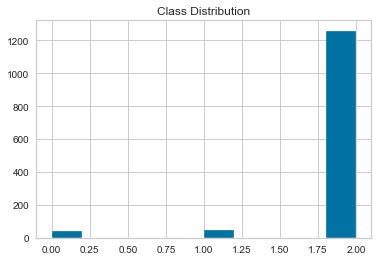

In [11]:
plt.hist(df['Cancer_type'])
plt.title('Class Distribution')
plt.show()

# Apparently, the testing dataset is a very skewed dataset. It is significantly different from the training dataset in terms of data distribution.  However, this the best data we can get for esting.

# Apply models saved in pickle files to new testing dataset

In [20]:
#Cancer_Features = df.iloc[:,2:-1]
good_features = ['MIMAT0019953', 'MIMAT0019810', 'MIMAT0018967', 'MIMAT0025846', 'MIMAT0026636', 'MIMAT0019869', 'MIMAT0018977', 'MIMAT0024615', 'MIMAT0019212', 'MIMAT0004794', 'MIMAT0019064', 'MIMAT0019946', 'MIMAT0022259']
Cancer_Features = df[good_features]


Cancer_Labels = df['Cancer_type']

X = Cancer_Features.values
y = Cancer_Labels.values
#y = np.array(Cancer_Labels.values)

Sample_IDs = list(Cancer_Features.index.values)

print("Feature shape: ")
print(X.shape)
print("Target shape: ")
print(y.shape)
#print(y)

Feature shape: 
(1350, 13)
Target shape: 
(1350,)


In [21]:
SVC_model = SVC(gamma='auto')

pickle_in = open("pickle_SVC.pkl", "rb")
SVC_model = pickle.load(pickle_in)
# close the file
pickle_in.close()


#prediction_score =  SVC_model.score(X, y)  

#print(prediction_score)



#model = SVC(gamma='auto')
#model.fit(X_train, y_train)

expected = y
predicted = SVC_model.predict(X)

print('Support Vector Classifier')
print('Mean Squared Error: %0.3f' % mse(expected, predicted))
print('Coefficient of Determination: %0.3f' % r2_score(expected, predicted))
print('Precision Score: ') 
precision_score(expected, predicted, average=None)

 


Support Vector Classifier
Mean Squared Error: 0.293
Coefficient of Determination: -0.964
Precision Score: 


array([0.75      , 0.12534819, 0.98627244])

In [28]:
RFr_model = RandomForestRegressor()

pickle_in = open("pickle_RFregressor.pkl", "rb")
RFr_model = pickle.load(pickle_in)
# close the file
pickle_in.close()

#prediction_score =  RFC_model.score(X, y)  
#print(prediction_score)
#0.7609402899656619

expected = y
predicted = RFr_model.predict(X)

print('Random Forest model')
print('Mean squared error = %0.3f' % mse(expected, predicted))
print('Coefficient of Determination = %0.3f' % r2_score(expected, predicted))




Random Forest model
Mean squared error = 1.716
Coefficient of Determination = -10.520


In [23]:
RFC_model = RandomForestClassifier(n_estimators=10)

pickle_in = open("pickle_RFC.pkl", "rb")
RFC_model = pickle.load(pickle_in)
# close the file
pickle_in.close()

#prediction_score =  RFC_model.score(X, y)  
#print(prediction_score)
#0.7609402899656619

expected = y
predicted = RFC_model.predict(X)

print('Random Forest model')
print('Mean squared error = %0.3f' % mse(expected, predicted))
print('Coefficient of Determination = %0.3f' % r2_score(expected, predicted))




Random Forest model
Mean squared error = 0.575
Coefficient of Determination = -2.859


In [128]:
pickle_in = open("pickle_SGDC.pkl", "rb")
SGDC_model = pickle.load(pickle_in)

#prediction_score =  SGDC_model.score(X, y)  
#print(prediction_score)
#0.8497800125707102

expected = y
predicted = SGDC_model.predict(X)

print('SGD Classifier')
print('Mean Squared Error: %0.3f' % mse(expected, predicted))
print('Coefficient of Determination: %0.3f' % r2_score(expected, predicted))
print('Precision Score: ') 
precision_score(expected, predicted, average=None)



SGD Classifier
Mean Squared Error: 0.244
Coefficient of Determination: -0.641
Precision Score: 


array([0.6875    , 0.14285714, 0.9543058 ])

In [25]:
pickle_in = open("pickle_LSVC.pkl", "rb")

LSVC_model = pickle.load(pickle_in)

# close the file
pickle_in.close()

#prediction_score =  LSVC_model.score(X, y)  
#print(prediction_score)
# 0.03896920175989944

expected = y
predicted = LSVC_model.predict(X)

print('Linear Support Vector Classifier')
print('Mean Squared Error: %0.3f' % mse(expected, predicted))
print('Coefficient of Determination: %0.3f' % r2_score(expected, predicted))
print('Precision Score: ') 
precision_score(expected, predicted, average=None)



Linear Support Vector Classifier
Mean Squared Error: 3.714
Coefficient of Determination: -23.934
Precision Score: 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([0.03080391, 0.        , 0.94736842])

In [26]:
pickle_in = open("pickle_ETC.pkl", "rb")
ETC_model = pickle.load(pickle_in)

# close the file
pickle_in.close()

#prediction_score =  ETC_model.score(X, y)  
#0.7938403519798869

expected = y
#y = y.reshape(1, -1)

predicted = ETC_model.predict(X)

print('Extra Trees Classifier')
print('Mean Squared Error: %0.3f' % mse(expected, predicted))
print('Coefficient of Determination: %0.3f' % r2_score(expected, predicted))
print('Precision Score: ') 
precision_score(expected, predicted, average=None)


#print(prediction_score)


Extra Trees Classifier
Mean Squared Error: 0.290
Coefficient of Determination: -0.944
Precision Score: 


array([0.7       , 0.13597734, 0.99155227])

# apparently, with SVC anf ETC, we achieved best classification toward the testing data. Not bad for a skewed dataset that significantly different from the training dataset.